In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Crime_Data.csv')


In [3]:
df.head

<bound method NDFrame.head of        Arrest Year Arrest Date  Arrest Hour  Age Defendant Race  \
0             2021   1/01/2021            0   38          BLACK   
1             2021   1/01/2021            0   31          BLACK   
2             2021   1/01/2021            0   35          BLACK   
3             2021   1/01/2021            0   31          BLACK   
4             2021   1/01/2021            0   21          BLACK   
...            ...         ...          ...  ...            ...   
15648         2021   9/09/2021           18   19          BLACK   
15649         2021   9/09/2021           20   61          BLACK   
15650         2021   9/09/2021           20   21          WHITE   
15651         2021   9/09/2021           21   30          BLACK   
15652         2021   9/09/2021           23   27          BLACK   

      Defendant Ethnicity Defendant Sex     Arrest Category  Offense Latitude  \
0                 UNKNOWN          MALE  Damage to Property            38.927   
1  

In [4]:
df.shape

(15653, 10)

In [5]:
df.columns

Index(['Arrest Year', 'Arrest Date', 'Arrest Hour', 'Age', 'Defendant Race',
       'Defendant Ethnicity', 'Defendant Sex', 'Arrest Category',
       'Offense Latitude', 'Offense Longitude'],
      dtype='object')

In [6]:
df.isnull()

,Arrest Year,Arrest Date,Arrest Hour,Age,Defendant Race,Defendant Ethnicity,Defendant Sex,Arrest Category,Offense Latitude,Offense Longitude
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15648,False,False,False,False,False,False,False,False,False,False
15649,False,False,False,False,False,False,False,False,False,False
15650,False,False,False,False,False,False,False,False,False,False
15651,False,False,False,False,False,False,False,False,False,False


In [7]:
features = ['Arrest Year', 'Arrest Date', 'Arrest Hour', 'Age', 'Defendant Race','Defendant Ethnicity', 'Defendant Sex', 'Arrest Category','Offense Latitude', 'Offense Longitude']

In [8]:
for feature in features:
    null_check = pd.isnull(df[feature])
    print(df[null_check])

Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, Defendant Race, Defendant Ethnicity, Defendant Sex, Arrest Category, Offense Latitude, Offense Longitude]
Index: []
Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, Defendant Race, Defendant Ethnicity, Defendant Sex, Arrest Category, Offense Latitude, Offense Longitude]
Index: []
Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, Defendant Race, Defendant Ethnicity, Defendant Sex, Arrest Category, Offense Latitude, Offense Longitude]
Index: []
Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, Defendant Race, Defendant Ethnicity, Defendant Sex, Arrest Category, Offense Latitude, Offense Longitude]
Index: []
Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, Defendant Race, Defendant Ethnicity, Defendant Sex, Arrest Category, Offense Latitude, Offense Longitude]
Index: []
Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, 

In [9]:
df = df.dropna()
df.shape

(15632, 10)

In [10]:
df['Arrest Category'].unique()

array(['Damage to Property', 'Simple Assault', 'Weapon Violations',
       'Narcotics', 'Other Crimes', 'Driving/Boating While Intoxicated',
       'Traffic Violations', 'Sex Offenses', 'Theft', 'Property Crimes',
       'Release Violations/Fugitive (Warr)',
       'Release Violations/Fugitive (Fug)',
       'Offenses Against Family & Children', 'Liquor Law Violations',
       'Assault with a Dangerous Weapon', 'Homicide',
       'Assault on a Police Officer', 'Burglary', 'Vending Violations',
       'Robbery', 'Motor Vehicle Theft', 'Sex Abuse',
       'Aggravated Assault', 'Disorderly Conduct', 'Gambling',
       'Kidnapping', 'Fraud and Financial Crimes',
       'Fraud and Financial Crimes (Frau)', 'Theft from Auto',
       'Prostitution', 'Fraud and Financial Crimes (Forg)',
       'Fraud and Financial Crimes (Coun)'], dtype=object)

In [11]:
df_sex = df.groupby('Defendant Sex').size().reset_index(name = 'Numbers')
df_sex

,Defendant Sex,Numbers
0,FEMALE,3419
1,MALE,12207
2,UNKNOWN,6


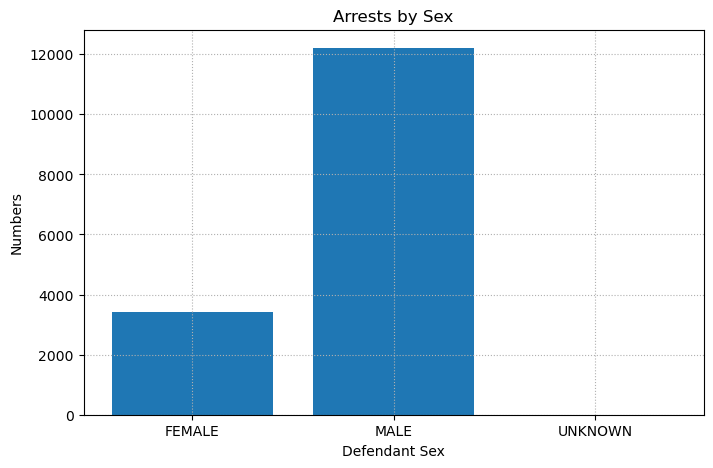

In [12]:
plt.figure(figsize = (8, 5))
plt.xlabel('Defendant Sex')
plt.title('Arrests by Sex')
plt.ylabel('Numbers')
x = df_sex['Defendant Sex']
y = df_sex['Numbers']
plt.bar(x, y)
plt.grid(which = 'both', linestyle = ':')
plt.savefig('defendant_sex.jpg', dpi = 480)

In [ ]:
#Contionous Data Classification

In [13]:
df_age = df.groupby('Age').size().reset_index(name = 'Numbers')
df_age

,Age,Numbers
0,18,275
1,19,311
2,20,390
3,21,483
4,22,447
...,...,...
64,83,1
65,85,1
66,88,1
67,120,4


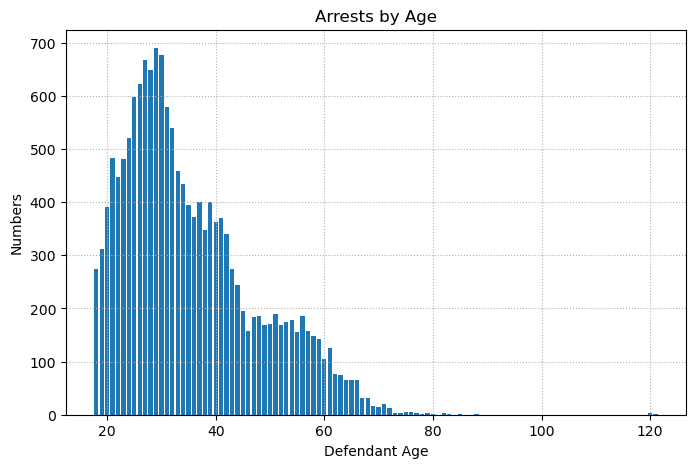

In [14]:
plt.figure(figsize = (8, 5))
plt.xlabel('Defendant Age')
plt.title('Arrests by Age')
plt.ylabel('Numbers')
x = df_age['Age']
y = df_age['Numbers']
plt.bar(x, y)
plt.grid(which = 'both', linestyle = ':')
#plt.savefig('defendant_sex.jpg', dpi = 480)

C:\Users\sarav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sarav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarav\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


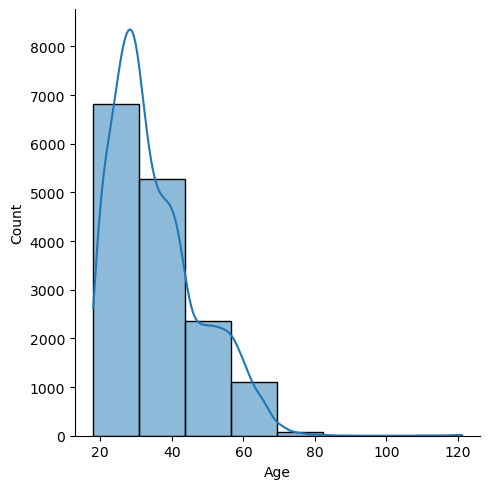

In [15]:
sns.displot(df['Age'], kde = True, bins = 8)

In [16]:
df_min = df['Age'].min()
df_max = df['Age'].max()
print(df_min, df_max)

18 121


In [ ]:
# Detecting Anomalies

<Axes: >

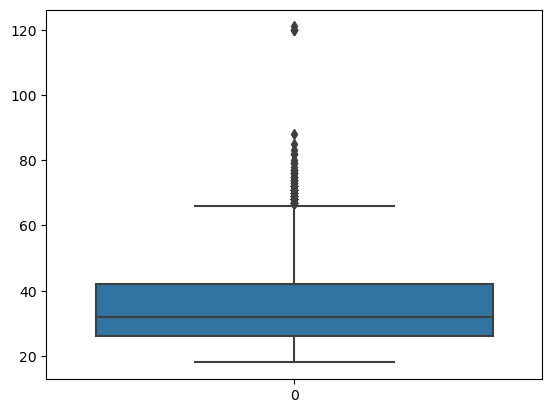

In [17]:
sns.boxplot(df['Age'])

In [ ]:
#Calculate the upper and the lower limits

In [18]:
q_1 = df['Age'].quantile(0.25)
q_3 = df['Age'].quantile(0.75)
iqr = q_3 - q_1
lower = q_1 - 1.5 * iqr
upper = q_3 + 1.5 * iqr

In [ ]:
#Create a boolean values to show outliers

In [19]:
upper_array = np.where(df['Age'] >= upper)[0]
lower_array = np.where(df['Age'] <= lower)[0]

In [ ]:
#Eliminate Outliers

In [20]:
df.drop(index = upper_array, inplace = True)
df.drop(index = lower_array, inplace = True)

C:\Users\sarav\AppData\Local\Temp\ipykernel_16076\3686508436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index = upper_array, inplace = True)
C:\Users\sarav\AppData\Local\Temp\ipykernel_16076\3686508436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index = lower_array, inplace = True)


In [21]:
df.shape

(15401, 10)